In [32]:
import pandas as pd

In [33]:
data_squad = pd.read_json('enhanced_valid_pred_labeled.json')
data_adversarial = pd.read_json('enhanced_adversarialQA_validation.json')
data_nq = pd.read_json('enhanced_nq_dev_formated.json')

In [34]:
with open("subset_percentage_for_datasets.csv", "w") as file:
    file.write(f"dataset,field,threshold,lower_percentage,higher_percentage,lower_count,higher_count")

In [35]:
def compute_size_percentage(dataset, data, field, threshold):
    data_higher, data_lower = [x for _, x in data.groupby(data[field] <= threshold)]
    with open("subset_percentage_for_datasets.csv", "a") as file_append:
            file_append.write(f"\n{dataset},{field},{threshold},{len(data_lower)/len(data)*100},{len(data_higher)/len(data)*100},{len(data_lower)},{len(data_higher)}")

In [36]:
fields = ['distances', 'similar_words', 'kth_sentence', 'cosine_similarity', 'answer_lenght', 'max_sim_ents', 'answer_subject_positions']

In [37]:
for i in range(0, 10, 1):
    compute_size_percentage('squad', data_squad[data_squad['distances'] >= 0], 'distances', i)
    compute_size_percentage('adversarial', data_adversarial[data_adversarial['distances'] >= 0], 'distances', i)
    compute_size_percentage('nq', data_nq[data_nq['distances'] >= 0], 'distances', i)

In [38]:
for i in range(0, 10, 1):
    compute_size_percentage('squad', data_squad, 'similar_words', i)
    compute_size_percentage('adversarial', data_adversarial, 'similar_words', i)
    compute_size_percentage('nq', data_nq, 'similar_words', i)

In [39]:
for i in range(0, 7, 1):
    compute_size_percentage('squad', data_squad, 'kth_sentence', i)
    compute_size_percentage('adversarial', data_adversarial, 'kth_sentence', i)
    compute_size_percentage('nq', data_nq, 'kth_sentence', i)

In [47]:
for i in range(1, 9, 1):
    compute_size_percentage('squad', data_squad, 'cosine_similarity', i/10)
    compute_size_percentage('adversarial', data_adversarial, 'cosine_similarity', i/10)
    compute_size_percentage('nq', data_nq, 'cosine_similarity', i/10)

In [41]:
for i in range(1, 10, 1):
    compute_size_percentage('squad', data_squad, 'answer_lenght', i)
    compute_size_percentage('adversarial', data_adversarial, 'answer_lenght', i)
    compute_size_percentage('nq', data_nq, 'answer_lenght', i)

In [42]:
for i in range(0, 10, 1):
    compute_size_percentage('squad', data_squad, 'max_sim_ents', i)
    compute_size_percentage('adversarial', data_adversarial, 'max_sim_ents', i)
    compute_size_percentage('nq', data_nq, 'max_sim_ents', i)

In [43]:
for i in range(0, 10, 1):
    compute_size_percentage('squad', data_squad[data_squad['answer_subject_positions'] >= 0], 'answer_subject_positions', i)
    compute_size_percentage('adversarial', data_adversarial[data_adversarial['answer_subject_positions'] >= 0], 'answer_subject_positions', i)
    compute_size_percentage('nq', data_nq[data_nq['answer_subject_positions'] >= 0], 'answer_subject_positions', i)

### Dataset statistics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_squad = pd.read_json('./enhanced_valid_pred_labeled.json')

In [3]:
data_nq = pd.read_json('./enhanced_nq_dev_formated.json')

In [4]:
data_adv = pd.read_json('./enhanced_adversarialQA_validation.json')

In [5]:
sns.set(rc={'figure.figsize':(16,9)})

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

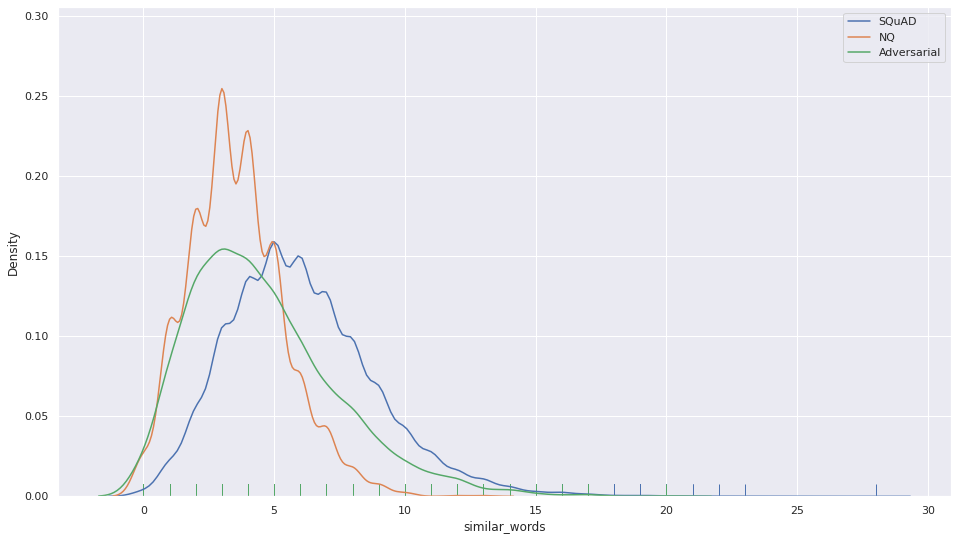

In [17]:
sns.distplot(data_squad['similar_words'], hist=False, rug=True)
sns.distplot(data_nq['similar_words'], hist=False, rug=True)
sns.distplot(data_adv['similar_words'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

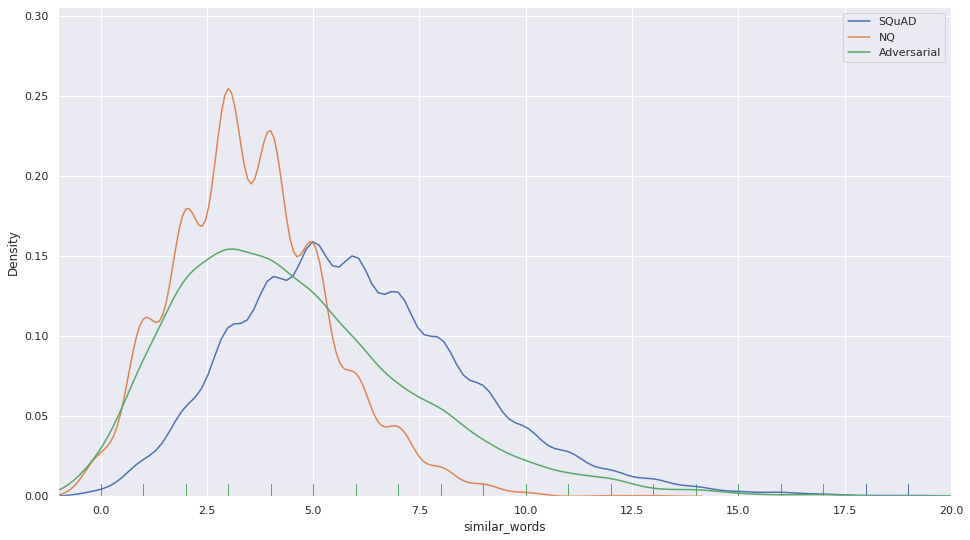

In [18]:
sns.distplot(data_squad['similar_words'], hist=False, rug=True).set_xlim(-1,20)
sns.distplot(data_nq['similar_words'], hist=False, rug=True).set_xlim(-1,20)
sns.distplot(data_adv['similar_words'], hist=False, rug=True).set_xlim(-1,20)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

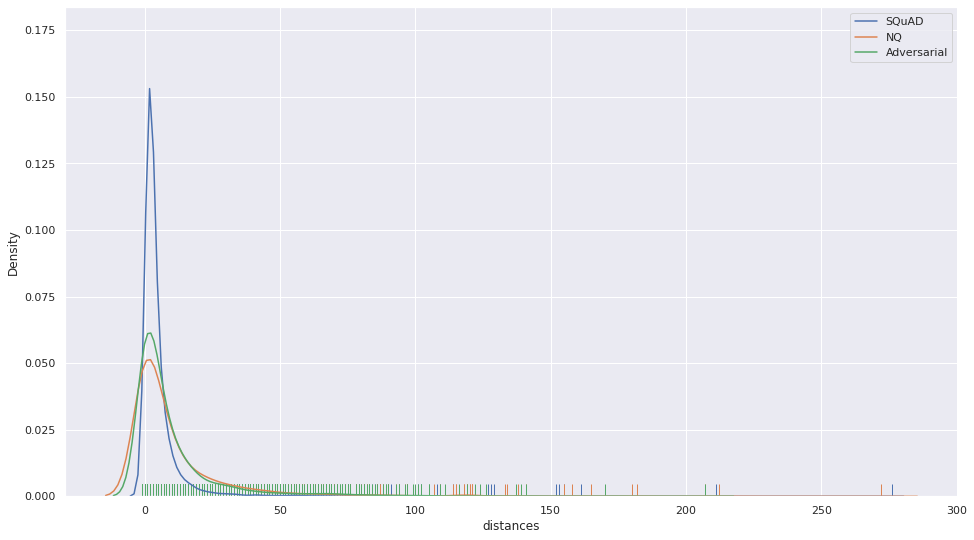

In [7]:
sns.distplot(data_squad['distances'], hist=False, rug=True)
sns.distplot(data_nq['distances'], hist=False, rug=True)
sns.distplot(data_adv['distances'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

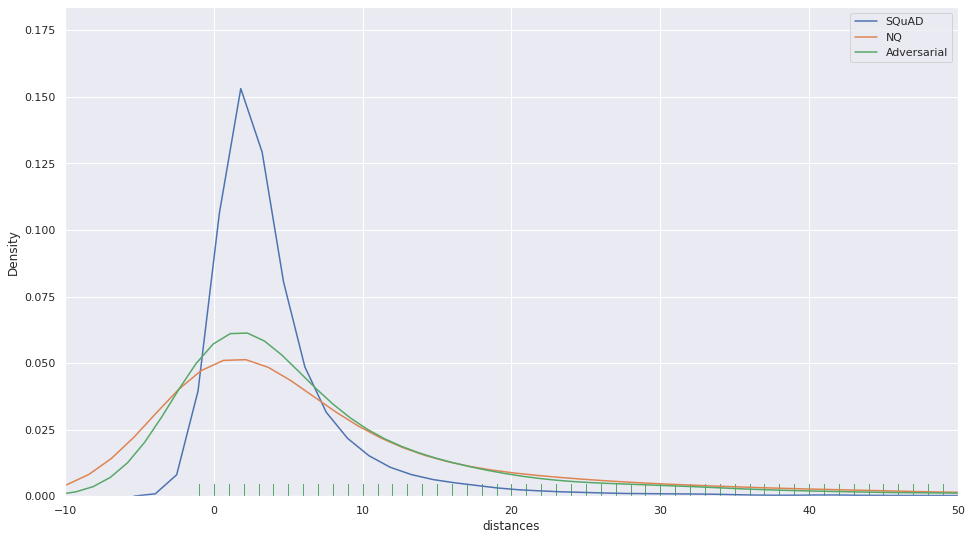

In [20]:
sns.distplot(data_squad['distances'], hist=False, rug=True).set_xlim(-10,50)
sns.distplot(data_nq['distances'], hist=False, rug=True).set_xlim(-10,50)
sns.distplot(data_adv['distances'], hist=False, rug=True).set_xlim(-10,50)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

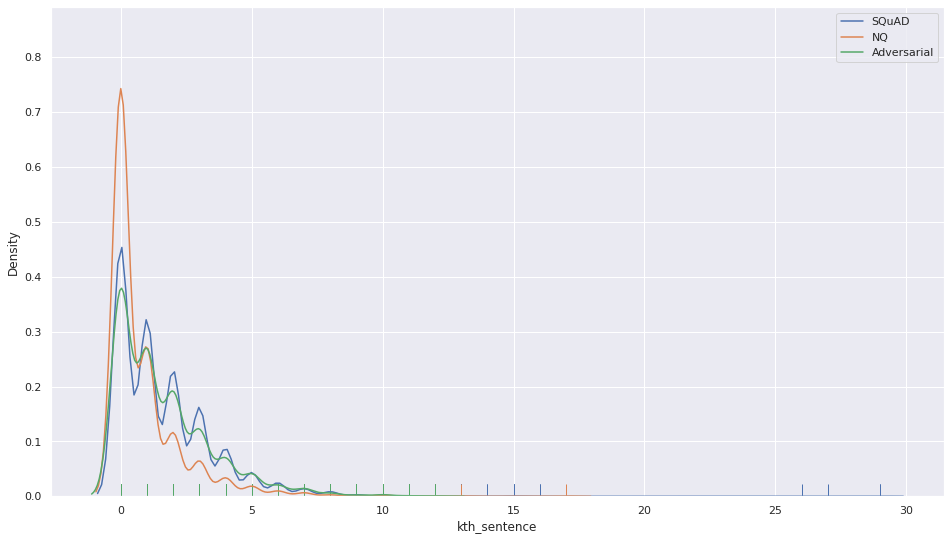

In [8]:
sns.distplot(data_squad['kth_sentence'], hist=False, rug=True)
sns.distplot(data_nq['kth_sentence'], hist=False, rug=True)
sns.distplot(data_adv['kth_sentence'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

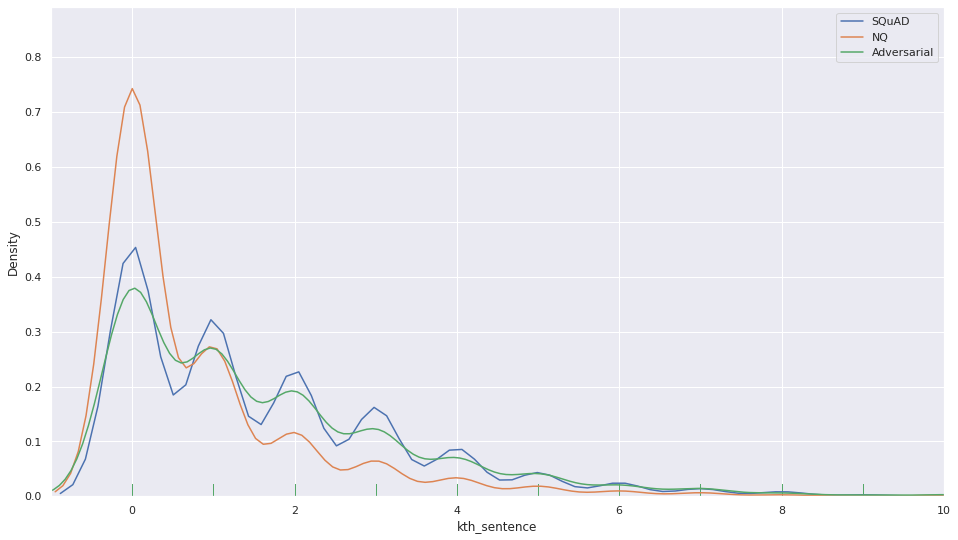

In [21]:
sns.distplot(data_squad['kth_sentence'], hist=False, rug=True).set_xlim(-1,10)
sns.distplot(data_nq['kth_sentence'], hist=False, rug=True).set_xlim(-1,10)
sns.distplot(data_adv['kth_sentence'], hist=False, rug=True).set_xlim(-1,10)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

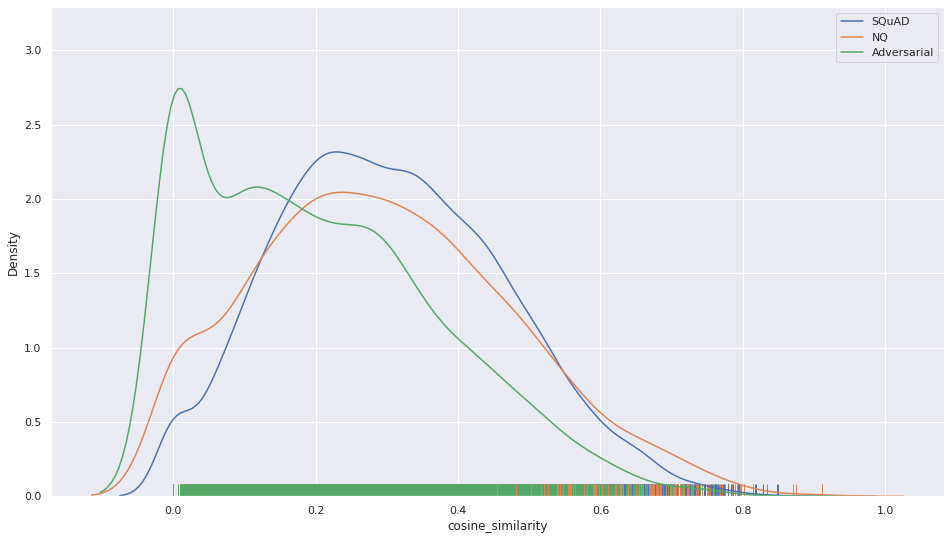

In [9]:
sns.distplot(data_squad['cosine_similarity'], hist=False, rug=True)
sns.distplot(data_nq['cosine_similarity'], hist=False, rug=True)
sns.distplot(data_adv['cosine_similarity'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

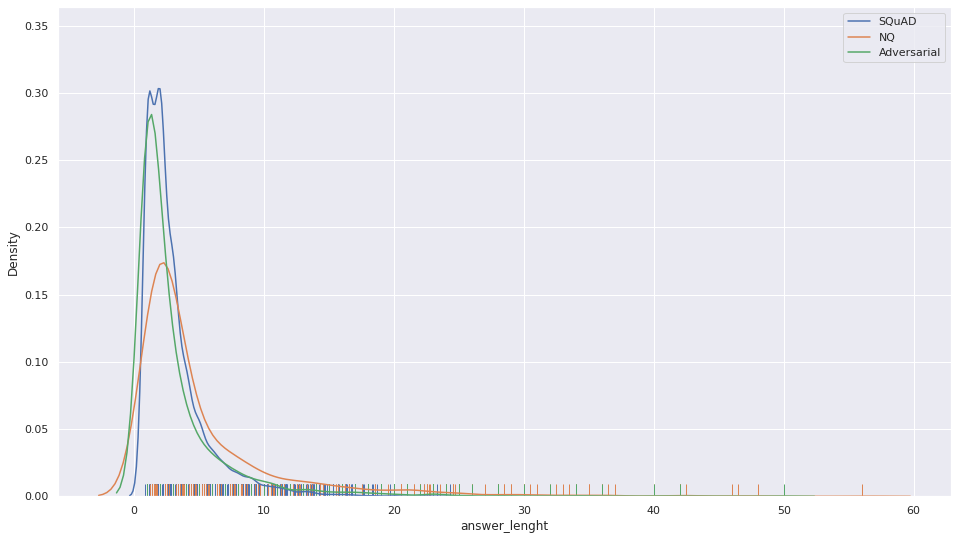

In [10]:
sns.distplot(data_squad['answer_lenght'], hist=False, rug=True)
sns.distplot(data_nq['answer_lenght'], hist=False, rug=True)
sns.distplot(data_adv['answer_lenght'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

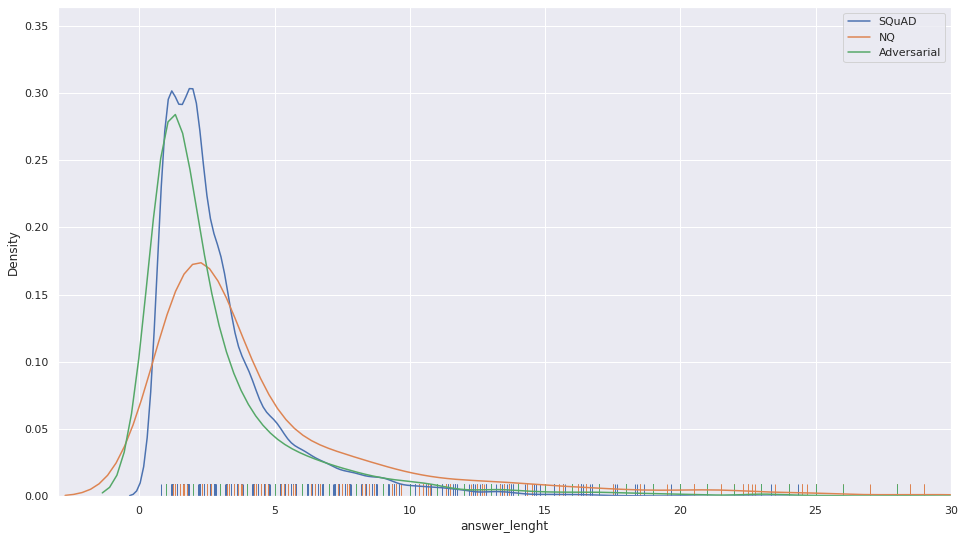

In [22]:
sns.distplot(data_squad['answer_lenght'], hist=False, rug=True).set_xlim(-3,30)
sns.distplot(data_nq['answer_lenght'], hist=False, rug=True).set_xlim(-3,30)
sns.distplot(data_adv['answer_lenght'], hist=False, rug=True).set_xlim(-3,30)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

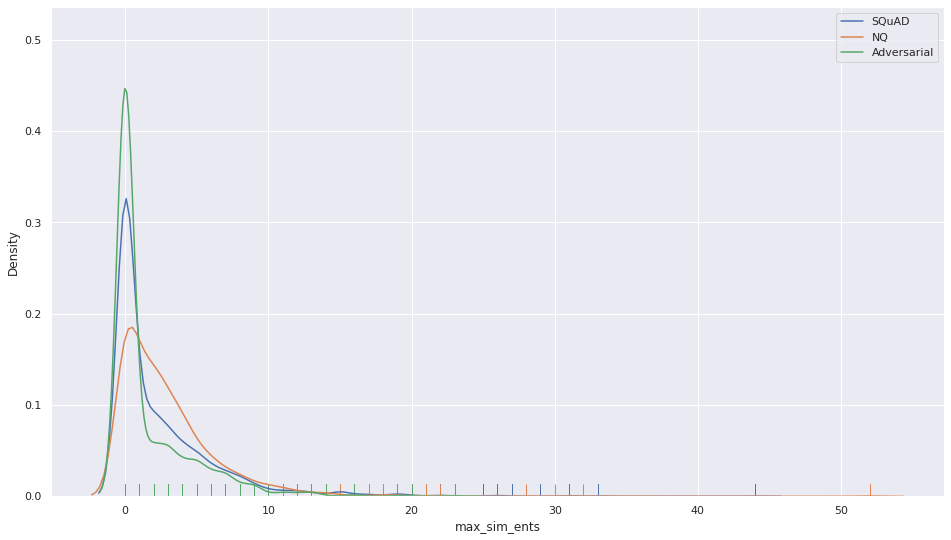

In [11]:
sns.distplot(data_squad['max_sim_ents'], hist=False, rug=True)
sns.distplot(data_nq['max_sim_ents'], hist=False, rug=True)
sns.distplot(data_adv['max_sim_ents'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

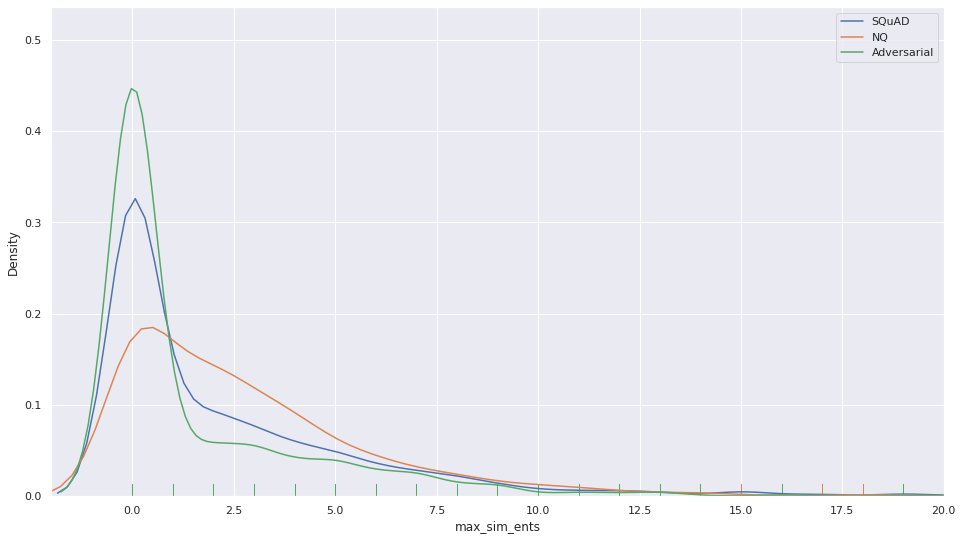

In [23]:
sns.distplot(data_squad['max_sim_ents'], hist=False, rug=True).set_xlim(-2,20)
sns.distplot(data_nq['max_sim_ents'], hist=False, rug=True).set_xlim(-2,20)
sns.distplot(data_adv['max_sim_ents'], hist=False, rug=True).set_xlim(-2,20)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

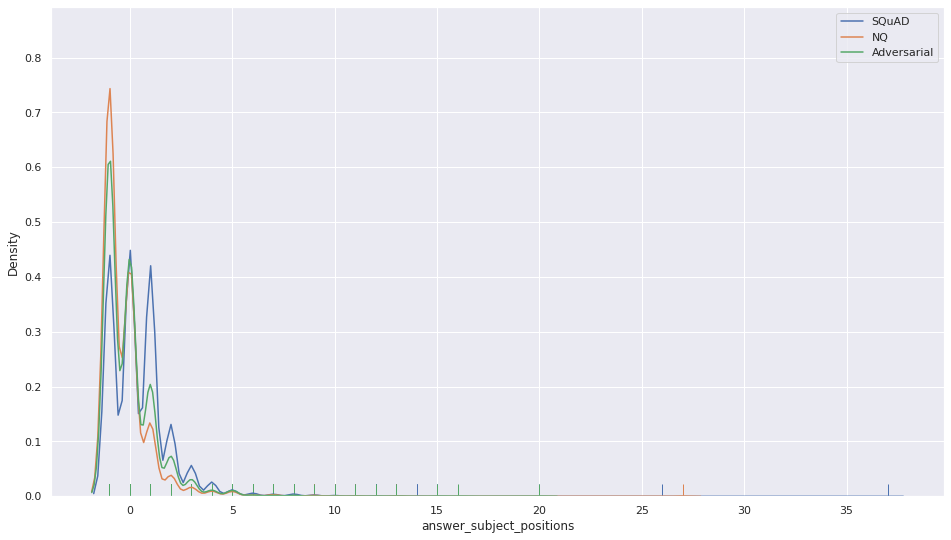

In [12]:
sns.distplot(data_squad['answer_subject_positions'], hist=False, rug=True)
sns.distplot(data_nq['answer_subject_positions'], hist=False, rug=True)
sns.distplot(data_adv['answer_subject_positions'], hist=False, rug=True)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luki/anaconda3

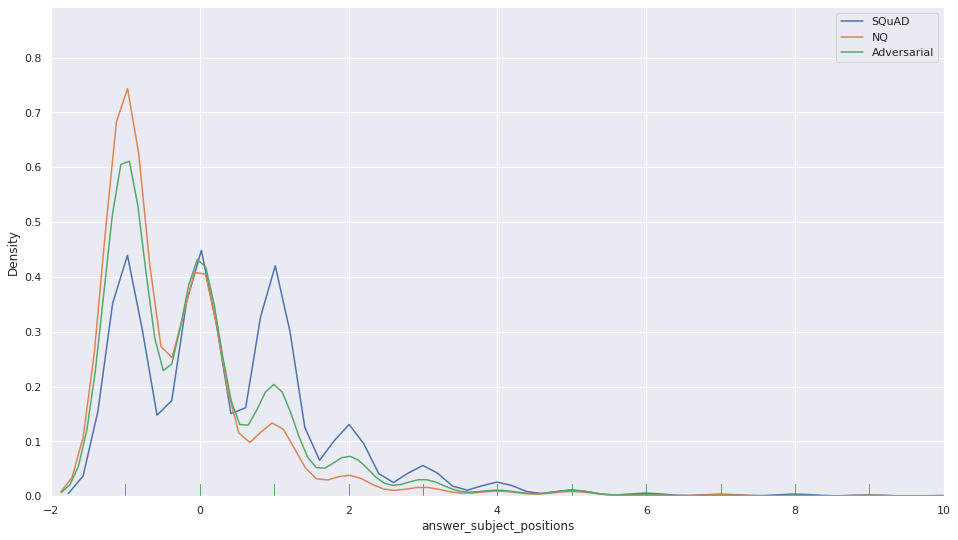

In [24]:
sns.distplot(data_squad['answer_subject_positions'], hist=False, rug=True).set_xlim(-2,10)
sns.distplot(data_nq['answer_subject_positions'], hist=False, rug=True).set_xlim(-2,10)
sns.distplot(data_adv['answer_subject_positions'], hist=False, rug=True).set_xlim(-2,10)
plt.legend(labels=["SQuAD","NQ","Adversarial"])

In [13]:
data_squad.describe()

,index,similar_words,distances,kth_sentence,cosine_similarity,answer_lenght,max_sim_ents,subject_in_context_count,answer_subject_positions
count,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000
mean,5284.500000,6.047020,4.970766,1.643992,0.306264,3.008505,2.461779,1.512961,0.487985
std,3051.440507,2.813025,9.297208,1.884932,0.158483,2.457632,3.915527,2.546469,1.633717
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.800000,0.000000,0.000000,-1.000000
25%,2642.250000,4.000000,1.000000,0.000000,0.187675,1.333333,0.000000,0.000000,-1.000000
50%,5284.500000,6.000000,3.000000,1.000000,0.296845,2.000000,1.000000,1.000000,0.000000
75%,7926.750000,8.000000,5.000000,3.000000,0.418278,3.666667,4.000000,2.000000,1.000000
max,10569.000000,28.000000,276.000000,29.000000,0.910359,24.333333,44.000000,69.000000,37.000000


In [14]:
data_nq.describe()

,index,id,similar_words,distances,kth_sentence,cosine_similarity,answer_lenght,max_sim_ents,subject_in_context_count,answer_subject_positions
count,2356.000000,2.356000e+03,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,1177.500000,-8.395843e+16,3.567063,10.688455,0.863328,0.296565,4.988349,2.968591,1.186757,-0.225382
std,680.262939,5.337481e+18,1.814357,21.140389,1.495640,0.179927,5.890170,3.683536,4.113250,1.367397
min,0.000000,-9.218072e+18,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,588.750000,-4.675573e+18,2.000000,-1.000000,0.000000,0.162393,2.000000,0.000000,0.000000,-1.000000
50%,1177.500000,-2.192914e+17,3.000000,4.000000,0.000000,0.284263,3.000000,2.000000,0.000000,-1.000000
75%,1766.250000,4.477328e+18,5.000000,12.000000,1.000000,0.418105,5.500000,4.000000,1.000000,0.000000
max,2355.000000,9.206636e+18,13.000000,272.000000,17.000000,0.910808,56.000000,52.000000,86.000000,27.000000


In [15]:
data_adv.describe()

,index,similar_words,distances,kth_sentence,cosine_similarity,answer_lenght,max_sim_ents,subject_in_context_count,answer_subject_positions
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,4.577000,9.768333,1.630333,0.204178,3.123333,1.604000,0.999333,0.006667
std,866.169729,2.828204,17.468573,1.838153,0.169344,3.910910,2.900228,2.003831,1.424300
min,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,749.750000,2.000000,0.000000,0.000000,0.060591,1.000000,0.000000,0.000000,-1.000000
50%,1499.500000,4.000000,4.000000,1.000000,0.180188,2.000000,0.000000,0.000000,0.000000
75%,2249.250000,6.000000,11.000000,2.000000,0.315669,3.000000,2.000000,1.000000,0.000000
max,2999.000000,20.000000,207.000000,12.000000,0.834417,50.000000,23.000000,23.000000,20.000000
